## Merge of the dataset of oscar and movies budet/popu/rating 

the_oscar_award.csv comes from:  https://www.kaggle.com/datasets/unanimad/the-oscar-award
movie_stat.csv comes from : https://github.com/danielgrijalva/movie-stats/blob/master/movies.csv

In [47]:
import pandas as pd

In [48]:
# oscars dataset : drop useless columns, change name to match the other datasets, keep only 4 categories of nominations
oscars = pd.read_csv('data/the_oscar_award.csv')
#oscars = oscars[oscars['category'].str.contains('ACTOR|ACTOR IN A SUPPORTING ROLE|ACTRESS|ACTRESS IN A SUPPORTING ROLE|DIRECTING', regex=True)]
oscars.rename(columns={'film': 'movie_name'}, inplace=True)
oscars.rename(columns={'year_film': 'Movie release date'}, inplace=True)

oscars['movie_name'] = oscars['movie_name'].str.lower().str.replace(' ', '_')

oscars

,Movie release date,year_ceremony,ceremony,category,name,movie_name,winner
0,1927,1928,1,ACTOR,Richard Barthelmess,the_noose,False
1,1927,1928,1,ACTOR,Emil Jannings,the_last_command,True
2,1927,1928,1,ACTRESS,Louise Dresser,a_ship_comes_in,False
3,1927,1928,1,ACTRESS,Janet Gaynor,7th_heaven,True
4,1927,1928,1,ACTRESS,Gloria Swanson,sadie_thompson,False
...,...,...,...,...,...,...,...
10884,2023,2024,96,WRITING (Original Screenplay),Written by Celine Song,past_lives,False
10885,2023,2024,96,JEAN HERSHOLT HUMANITARIAN AWARD,NaN,NaN,True
10886,2023,2024,96,HONORARY AWARD,"To Angela Bassett, who has inspired audiences ...",NaN,True
10887,2023,2024,96,HONORARY AWARD,"To Mel Brooks, for his comedic brilliance, pro...",NaN,True


In [49]:
# need to have only one row per movie: addition of a 'num_nominations' column to count the number of nominations per movie, 
# and a 'winner' column to know if the movie won the category and by who --> will be matched with the actors we are interested in

oscars_to_merge = oscars.groupby(['movie_name'], as_index=False).agg({
    'Movie release date': 'first',
    'category': lambda x: ', '.join(f"{cat}: {name}" for cat, name in zip(x, oscars.loc[x.index, 'name'])),
    'winner': lambda x: ', '.join(oscars.loc[x.index, 'name'][oscars.loc[x.index, 'winner']]),
    'category': 'count'
}).rename(columns={'category': 'num_nominations'})

oscars_to_merge['winner'].value_counts()

winner
                                                                                                                                                                                                                             3713
Walt Disney, Producer                                                                                                                                                                                                          22
Metro-Goldwyn-Mayer                                                                                                                                                                                                            10
France                                                                                                                                                                                                                          8
Italy                                                                                    

In [50]:
movie_stats = pd.read_csv('data/movie_stats.csv')
movie_stats.rename(columns={'name': 'movie_name'}, inplace=True)
movie_stats.rename(columns={'year': 'Movie release date'}, inplace=True)
movie_stats['movie_name'] = movie_stats['movie_name'].str.lower().str.replace(' ', '_')

def convert_to_datetime(date):
    # Check if the date is just a year (4 digits) and convert it to 'yyyy-01-01' format
    if len(str(date)) == 4 and str(date).isdigit():  # Only year (e.g., 1988)
        return pd.to_datetime(str(date) + '-01-01')
    else:
        return pd.to_datetime(date, errors='coerce')  # Convert if it's in a full date format

movie_stats['Movie release date'] = movie_stats['Movie release date'].apply(convert_to_datetime)
movie_stats['Movie release date'] = movie_stats['Movie release date'].dt.year

movie_stats


,movie_name,rating,genre,Movie release date,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,the_shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,the_blue_lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,star_wars:_episode_v_-_the_empire_strikes_back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,more_to_life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,dream_round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,saving_mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,it's_just_us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [51]:
# CMU Movie dataset : kept all columns, change name to match the other datasets

original_data = pd.read_csv('data/movie.metadata.tsv', sep='\t', names= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])
original_data.rename(columns={'Movie name': 'movie_name'}, inplace=True)

original_data['movie_name'] = original_data['movie_name'].str.lower().str.replace(' ', '_')

original_data['Movie release date'] = original_data['Movie release date'].apply(convert_to_datetime)
original_data['Movie release date'] = original_data['Movie release date'].dt.year

original_data

,Wikipedia movie ID,Freebase movie ID,movie_name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,ghosts_of_mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,getting_away_with_murder:_the_jonbenét_ramsey_...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,brun_bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,white_of_the_eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,a_woman_in_flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,mermaids:_the_body_found,2011.0,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,knuckle,2011.0,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,another_nice_mess,1972.0,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,the_super_dimension_fortress_macross_ii:_lover...,1992.0,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [52]:
# merged original and movie stats 
merged = pd.merge(original_data, movie_stats, on=['movie_name', 'Movie release date'], how='left')
final_merged_data = merged.merge(oscars_to_merge, on=['movie_name', 'Movie release date'], how='left')

# drop irelevant columns
final_merged_data.drop(columns=['Wikipedia movie ID', 'Freebase movie ID', 'genre', 'released', 'country', 'runtime', 'rating', 'writer'], inplace=True)

# #rename for homogeneity
final_merged_data.rename(columns={'movie_name': 'Movie name', 'score': 'Movie score', 'votes': 'Movie votes', 'director': 'Movie director', 'star': 'Movie star', 'budget': 'Movie budget', 'gross': 'Movie gross', 'company': 'Movie company', 'num_nominations': 'Number of nomination', 'winner': 'Nomination winner'}, inplace=True)

# addition of the budget/revenues ratio 
final_merged_data['Revenue/Budget ratio'] = final_merged_data['Movie box office revenue'] / final_merged_data['Movie budget']

# change of type 
final_merged_data['Movie release date'] = final_merged_data['Movie release date'].astype('Int64')

# cleaner format of the columns
def get_key_values(x):
     return ', '.join(x.values())

final_merged_data['Movie genres'] = final_merged_data['Movie genres'].apply(eval).apply(get_key_values)
#final_merged_data['Movie languages'] = final_merged_data['Movie languages'].apply(eval).apply(get_key_values) # get issue when saving to csv: 'utf-8' codec can't encode characters in position 33-44: surrogates not allowed"
final_merged_data['Movie countries'] = final_merged_data['Movie countries'].apply(eval).apply(get_key_values)

final_merged_data.to_csv('data/final_merged_data.csv', index=False)
final_merged_data


,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,Movie star,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio
0,ghosts_of_mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",4.9,52000.0,John Carpenter,Natasha Henstridge,28000000.0,14010832.0,Screen Gems,NaN,NaN,0.500387
1,getting_away_with_murder:_the_jonbenét_ramsey_...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,brun_bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,white_of_the_eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"Thriller, Erotic thriller, Psychological thriller",6.2,2200.0,Donald Cammell,David Keith,NaN,NaN,Mrs. White's Productions,NaN,NaN,NaN
4,a_woman_in_flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}",Germany,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81736,mermaids:_the_body_found,2011,NaN,120.0,"{""/m/02h40lc"": ""English Language""}",United States of America,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81737,knuckle,2011,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","Ireland, United Kingdom","Biographical film, Drama, Documentary",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81738,another_nice_mess,1972,NaN,66.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Satire, Comedy",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81739,the_super_dimension_fortress_macross_ii:_lover...,1992,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}",Japan,"Science Fiction, Japanese Movies, Adventure, A...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


$\text{Weighted Rating} = \frac{(v / (v + m)) \times R + (m / (v + m)) \times C}$

## Creation of the criteria for rating **film success**



In [53]:
clean_df = final_merged_data.dropna(subset=['Movie box office revenue', 'Movie budget', 'Movie score', 'Movie votes', 'Revenue/Budget ratio']).copy()
clean_df[['Movie name', 'Movie genres', 'Movie box office revenue', 'Movie budget', 'Movie score', 'Movie votes', 'Nomination winner','Revenue/Budget ratio']].sort_values(by='Revenue/Budget ratio', ascending = False)

,Movie name,Movie genres,Movie box office revenue,Movie budget,Movie score,Movie votes,Nomination winner,Revenue/Budget ratio
33438,the_blair_witch_project,"Horror, Indie, Supernatural, Cult, Mystery, Ar...",248639099.0,60000.0,6.5,239000.0,NaN,4143.984983
67652,el_mariachi,"Thriller, Action/Adventure, Gangster Film, Ind...",2040920.0,7000.0,6.9,64000.0,NaN,291.560000
29206,napoleon_dynamite,"Indie, Absurdism, Cult, Coming of age, Comedy,...",46118099.0,400000.0,6.9,204000.0,NaN,115.295248
31667,in_the_company_of_men,"Black comedy, Drama, Indie",2856622.0,25000.0,7.2,13000.0,NaN,114.264880
24914,keeping_mum,"Black comedy, Comedy",18575768.0,169000.0,6.8,34000.0,NaN,109.915787
...,...,...,...,...,...,...,...,...
76987,the_boondock_saints,"LGBT, Thriller, Buddy film, Indie, Drama, Crim...",30471.0,6000000.0,7.8,230000.0,NaN,0.005078
58128,best_laid_plans,"Crime Fiction, Thriller, Psychological thrille...",27816.0,7000000.0,6.1,7400.0,NaN,0.003974
49848,rock_&_rule,"Musical, Science Fiction, Animation",30379.0,8000000.0,6.5,3400.0,NaN,0.003797
19093,dangerous_game,"Drama, Indie",23671.0,10000000.0,5.6,3600.0,NaN,0.002367


In [ ]:
# Set a cap at the 95th percentile, so every movie above this cap has max revenue/budget score. This brings outliers with absurdly high ratios to skew data 
cap_value = clean_df['Revenue/Budget ratio'].quantile(0.95)
print(cap_value)
clean_df['Capped Revenue/Budget ratio'] = clean_df['Revenue/Budget ratio'].clip(upper=cap_value)

# Now normalize the capped values to a 0-10 scale
clean_df['Normalized Revenue/Budget ratio'] = 10 * (
    clean_df['Capped Revenue/Budget ratio'] - clean_df['Capped Revenue/Budget ratio'].min()) / (
    clean_df['Capped Revenue/Budget ratio'].max() - clean_df['Capped Revenue/Budget ratio'].min())


clean_df.sort_values(by='Normalized Revenue/Budget ratio', ascending= False).head(100)



9.97469745454545


,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,...,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Capped Revenue/Budget ratio,Normalized Revenue/Budget ratio,Nomination Score,Success Index
41507,risky_business,1983,63541723.0,99.0,"{""/m/04306rv"": ""German Language"", ""/m/02h40lc""...",United States of America,"Sex comedy, Satire, Comedy-drama, Comedy",6.8,83000.0,Paul Brickman,...,6200000.0,63541777.0,The Geffen Company,NaN,NaN,10.248665,9.974697,10.0,0.00,4.606656
77522,me_and_you_and_everyone_we_know,2005,8012838.0,91.0,"{""/m/02h40lc"": ""English Language""}","United States of America, United Kingdom","Romantic comedy, Indie, Comedy of manners, Com...",7.3,36000.0,Miranda July,...,800000.0,8012838.0,IFC Films,NaN,NaN,10.016048,9.974697,10.0,0.00,4.763826
17108,amores_perros,2000,20908467.0,154.0,"{""/m/06nm1"": ""Spanish Language""}",Mexico,"Thriller, Ensemble Film, Drama",8.1,228000.0,Alejandro G. Iñárritu,...,2000000.0,20908467.0,Altavista Films,1.0,,10.454234,9.974697,10.0,1.00,5.464505
65213,swingers,1996,4555020.0,96.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Romantic comedy, Buddy film, Indie, Cult, Come...",7.2,77000.0,Doug Liman,...,200000.0,4555020.0,Doug Liman Productions,NaN,NaN,22.775100,9.974697,10.0,0.00,5.880000
65287,forrest_gump,1994,677387716.0,136.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Coming of age, Comedy film, Drama, War film, R...",8.8,1900000.0,Robert Zemeckis,...,55000000.0,678226133.0,Paramount Pictures,13.0,"Tom Hanks, Robert Zemeckis, Arthur Schmidt, We...",12.316140,9.974697,10.0,10.00,8.787321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31667,in_the_company_of_men,1997,2856622.0,93.0,"{""/m/02h40lc"": ""English Language""}","United States of America, Canada","Black comedy, Drama, Indie",7.2,13000.0,Neil LaBute,...,25000.0,2804473.0,Alliance Atlantis Communications,NaN,NaN,114.264880,9.974697,10.0,0.00,5.880000
31589,speed,1994,350448145.0,115.0,"{""/m/02h40lc"": ""English Language"", ""/m/0t_2"": ...",United States of America,"Thriller, Action/Adventure, Action, Crime Fict...",7.2,339000.0,Jan de Bont,...,30000000.0,350448145.0,The Mark Gordon Company,3.0,"Gregg Landaker, Steve Maslow, Bob Beemer, Davi...",11.681605,9.974697,10.0,2.50,5.780490
47869,back_to_the_future,1985,383874862.0,116.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Science Fiction, Adventure, Americana, Humour,...",8.5,1100000.0,Robert Zemeckis,...,19000000.0,381906762.0,Universal Pictures,4.0,"Charles L. Campbell, Robert Rutledge",20.203940,9.974697,10.0,3.25,7.375000
47896,indiana_jones_and_the_raiders_of_the_lost_ark,1981,389925971.0,115.0,"{""/m/0jzc"": ""Arabic Language"", ""/m/0h0t4"": ""Ne...",United States of America,"Adventure, Costume Adventure, Action/Adventure...",8.4,905000.0,Steven Spielberg,...,18000000.0,389925971.0,Paramount Pictures,NaN,NaN,21.662554,9.974697,10.0,0.00,6.360000


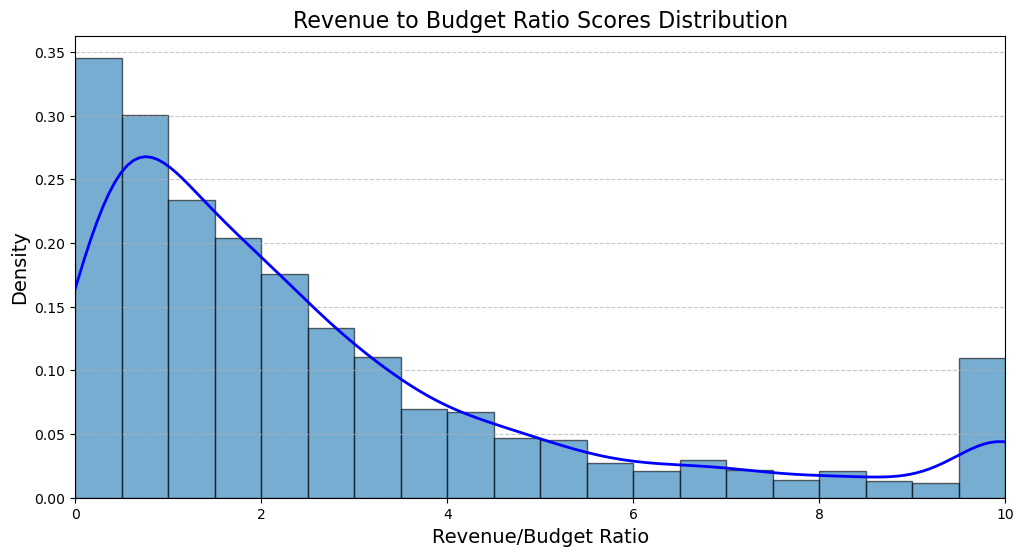

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.hist(clean_df['Normalized Revenue/Budget ratio'], bins=20, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Normalized Revenue/Budget ratio', color='blue', linewidth=2)

plt.title('Revenue to Budget Ratio Scores Distribution', fontsize=16)
plt.xlabel('Revenue/Budget Ratio', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

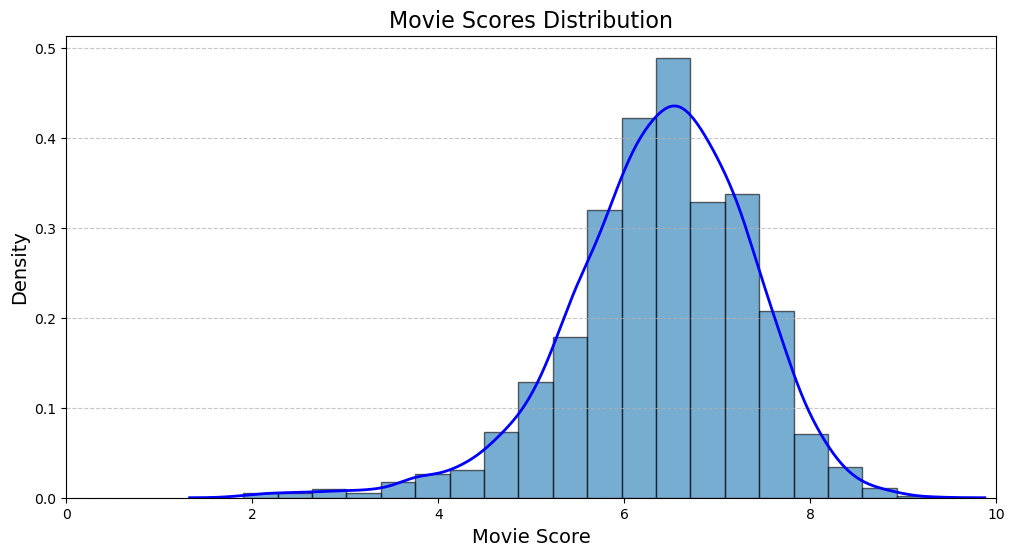

In [129]:
plt.figure(figsize=(12, 6))

plt.hist(clean_df['Movie score'], bins=20, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Movie score', color='blue', linewidth=2)

plt.title('Movie Scores Distribution', fontsize=16)
plt.xlabel('Movie Score', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [130]:
clean_df['Nomination Score'] = 1+ 9 * (
    (clean_df['Number of nomination'] - clean_df['Number of nomination'].min()) /
    (clean_df['Number of nomination'].max() - clean_df['Number of nomination'].min())
)
# put a score of 0 for movies with no nominations
clean_df['Nomination Score'].fillna(0, inplace=True)

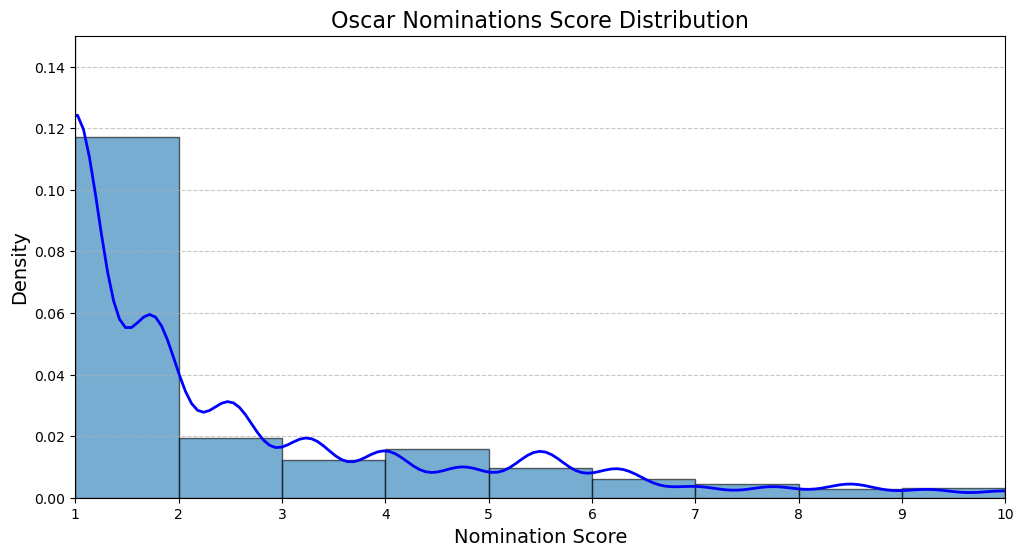

In [133]:
plt.figure(figsize=(12, 6))

plt.hist(clean_df['Nomination Score'], bins=10, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Nomination Score', color='blue', linewidth=2)

plt.title('Oscar Nominations Score Distribution', fontsize=16)
plt.xlabel('Nomination Score', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((1, 10))
plt.ylim((0,0.150))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [189]:
# For the moment we choose these weights
weight_popularity = 0.4
weight_revenue_ratio = 0.3
weight_nominations = 0.3

# Success index calc
clean_df['Success Index'] = (
    clean_df['Movie score'] * weight_popularity +
    clean_df['Normalized Revenue/Budget ratio'] * weight_revenue_ratio +
    clean_df['Nomination Score'] * weight_nominations
)


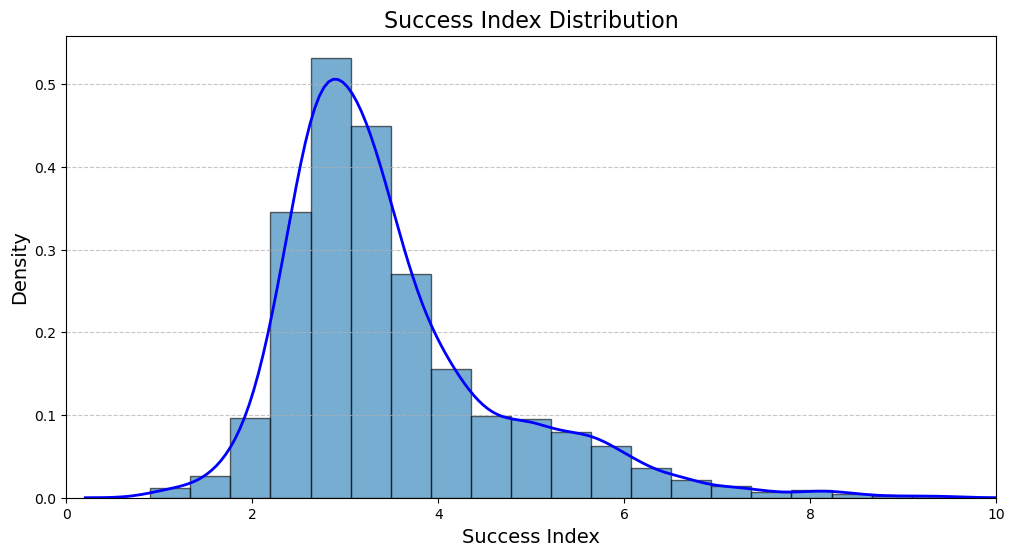

In [190]:
plt.figure(figsize=(12, 6))

plt.hist(clean_df['Success Index'], bins=20, edgecolor='black', alpha=0.6, density=True)

# KDE plot
sns.kdeplot(data=clean_df, x='Success Index', color='blue', linewidth=2)

plt.title('Success Index Distribution', fontsize=16)
plt.xlabel('Success Index', fontsize=14)
plt.ylabel('Density', fontsize=14) 
plt.xlim((0, 10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [191]:
clean_df.loc[clean_df['Success Index'] > 5].sort_values(by='Success Index', ascending= False)

,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,...,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Capped Revenue/Budget ratio,Normalized Revenue/Budget ratio,Nomination Score,Success Index
65287,forrest_gump,1994,6.773877e+08,136.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Coming of age, Comedy film, Drama, War film, R...",8.8,1900000.0,Robert Zemeckis,...,55000000.0,6.782261e+08,Paramount Pictures,13.0,"Tom Hanks, Robert Zemeckis, Arthur Schmidt, We...",12.316140,9.974697,10.000000,10.00,9.520000
79973,the_lord_of_the_rings:_the_fellowship_of_the_ring,2001,8.715303e+08,178.0,"{""/m/02h40lc"": ""English Language""}","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Fantasy, F...",8.8,1700000.0,Peter Jackson,...,93000000.0,8.976901e+08,New Line Cinema,13.0,"Andrew Lesnie, Peter Owen, Richard Taylor, How...",9.371294,9.371294,9.394954,10.00,9.338486
25386,schindler's_list,1993,3.213063e+08,186.0,"{""/m/064_8sq"": ""French Language"", ""/m/05qqm"": ...",United States of America,"Tragedy, Biography, History, War film, Biopic ...",8.9,1200000.0,Steven Spielberg,...,22000000.0,3.221612e+08,Universal Pictures,12.0,Art Direction: Allan Starski; Set Decoration...,14.604832,9.974697,10.000000,9.25,9.335000
80920,the_lord_of_the_rings:_the_return_of_the_king,2003,1.119930e+09,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","United States of America, New Zealand","Fantasy Adventure, Adventure, Epic, Action/Adv...",8.9,1700000.0,Peter Jackson,...,94000000.0,1.146031e+09,New Line Cinema,11.0,Art Direction: Grant Major; Set Decoration: Da...,11.914144,9.974697,10.000000,8.50,9.110000
13423,dances_with_wolves,1990,4.242088e+08,224.0,"{""/m/0565z6"": ""Sioux language"", ""/m/06dqgy"": ""...","United States of America, United Kingdom","Adventure, Epic Western, Costume drama, Indian...",8.0,247000.0,Kevin Costner,...,22000000.0,4.242088e+08,Tig Productions,12.0,"Dean Semler, Kevin Costner, Neil Travis, John ...",19.282220,9.974697,10.000000,9.25,8.975000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42758,colors,1988,4.661607e+07,120.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...",United States of America,"Crime Fiction, Drama, Action, Buddy film, Indie",6.7,25000.0,Dennis Hopper,...,6000000.0,4.661607e+07,Orion Pictures,NaN,NaN,7.769344,7.769344,7.788646,0.00,5.016594
64199,city_slickers,1991,1.790338e+08,114.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Buddy film, Adventure, Comedy-drama, Action/Ad...",6.8,51000.0,Ron Underwood,...,27000000.0,1.790338e+08,Castle Rock Entertainment,1.0,Jack Palance,6.630881,6.630881,6.647084,1.00,5.014125
60237,the_naked_gun:_from_the_files_of_police_squad!,1988,7.875618e+07,85.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Parody, Crime Fiction, Screwball comedy, Comed...",7.6,158000.0,David Zucker,...,12000000.0,7.875618e+07,Paramount Pictures,NaN,NaN,6.563015,6.563015,6.579033,0.00,5.013710
67466,cape_fear,1991,1.822920e+08,120.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Crime Fiction, Thriller, Remake, Psychological...",7.3,180000.0,Martin Scorsese,...,35000000.0,1.822920e+08,Amblin Entertainment,2.0,,5.208342,5.208342,5.220674,1.75,5.011202


In [192]:
clean_df.loc[clean_df['Movie name'] == 'avatar' ]

,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,...,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio,Capped Revenue/Budget ratio,Normalized Revenue/Budget ratio,Nomination Score,Success Index
23702,avatar,2009,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","United States of America, United Kingdom","Thriller, Science Fiction, Adventure, Computer...",7.8,1100000.0,James Cameron,...,237000000.0,2.847246e+09,Twentieth Century Fox,9.0,Production Design: Rick Carter and Robert Stro...,11.739558,9.974697,10.0,7.0,8.22


In [193]:
# Checking correlation with relevant features we chose
correlation_with_gross = clean_df['Success Index'].corr(clean_df['Movie box office revenue'], method='pearson')
print("Correlation with Box Office Gross:", correlation_with_gross)
correlation_with_pop = clean_df['Success Index'].corr(clean_df['Movie score'], method='pearson')
print("Correlation with Popularity:", correlation_with_pop)
correlation_with_oscar = clean_df['Success Index'].corr(clean_df['Number of nomination'], method='pearson')
print("Correlation with Oscar Nominations:", correlation_with_oscar)



Correlation with Box Office Gross: 0.4545715600556527
Correlation with Popularity: 0.6493216195207036
Correlation with Oscar Nominations: 0.7090262334708727


In [194]:

import statsmodels.api as sm

# Check if we can predict well box office revenue with our index
X = sm.add_constant(clean_df['Success Index'])  
Y = clean_df['Movie box office revenue']

model = sm.OLS(Y, X).fit()
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Movie box office revenue   R-squared:                       0.207
Model:                                  OLS   Adj. R-squared:                  0.206
Method:                       Least Squares   F-statistic:                     920.7
Date:                    ven., 08 nov. 2024   Prob (F-statistic):          6.14e-180
Time:                              16:55:19   Log-Likelihood:                -71196.
No. Observations:                      3537   AIC:                         1.424e+05
Df Residuals:                          3535   BIC:                         1.424e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

### Elise analysis plot 



In [58]:
dataset = pd.read_csv('data/final_merged_data.csv')
original = pd.read_csv('data/movie.metadata.tsv', sep='\t', names= ['Wikipedia movie ID', 'Freebase movie ID', 'Movie name', 'Movie release date', 'Movie box office revenue', 'Movie runtime', 'Movie languages', 'Movie countries', 'Movie genres'])
dataset.head()

,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres,Movie score,Movie votes,Movie director,Movie star,Movie budget,Movie gross,Movie company,Number of nomination,Nomination winner,Revenue/Budget ratio
0,ghosts_of_mars,2001.0,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Thriller, Science Fiction, Horror, Adventure, ...",4.9,52000.0,John Carpenter,Natasha Henstridge,28000000.0,14010832.0,Screen Gems,NaN,NaN,0.500387
1,getting_away_with_murder:_the_jonbenét_ramsey_...,2000.0,NaN,95.0,"{""/m/02h40lc"": ""English Language""}",United States of America,"Mystery, Biographical film, Drama, Crime Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,brun_bitter,1988.0,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}",Norway,"Crime Fiction, Drama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,white_of_the_eye,1987.0,NaN,110.0,"{""/m/02h40lc"": ""English Language""}",United Kingdom,"Thriller, Erotic thriller, Psychological thriller",6.2,2200.0,Donald Cammell,David Keith,NaN,NaN,Mrs. White's Productions,NaN,NaN,NaN
4,a_woman_in_flames,1983.0,NaN,106.0,"{""/m/04306rv"": ""German Language""}",Germany,Drama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To establish the success of our index, we are interested in specific criteria such as budget, revenues, ratings, number of nominations, and the budget-to-revenue ratio. Our goal is to assess whether we have sufficient data and reliable information to effectively study these criteria. This will involve evaluating the completeness and accuracy of the data available for each metric, ensuring that we can draw meaningful conclusions about the factors contributing to success.